# 데이터 분석 프로젝트

##### 공통 진행
- 문제 파악하기
- 데이터 수집 또는 준비
- EDA 탐색적 자료 분석

##### 개별 진행
- 데이터 전처리
- 데이터 분석
- 머신 러닝 모델링
- 결과 분석 및 보고서 작성 후 제출 (개인별 강의 평가자료에 활용)
- 모든 작업 내용 팀원간 공유 및 피드백 적극 활용

##### 결과 발표
- 팀원 모두의 결과를 취합하여 포트폴리오 작성 후 제출
   (팀 포트폴리오 자료 및 발표자료)
 - 발표자료 준비하여 발표

## 데이터 준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sh = pd.read_csv('Sleep_health.csv')
sh.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### 데이터 나누기 전 혈압 카테고리 분리

In [3]:
sh['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [4]:
sh = pd.concat([sh, sh['Blood Pressure'].str.split('/', expand = True)],
              axis = 1).drop('Blood Pressure', axis = 1)

In [5]:
sh = sh.rename(columns = {0: 'BloodPressure_high', 1: 'BloodPressure_low'})

In [6]:
sh['BloodPressure_high'] = sh['BloodPressure_high'].astype(float)
sh['BloodPressure_low'] = sh['BloodPressure_low'].astype(float)

### 표 전체 시각화

C:\Users\jongyeon.woo\AppData\Local\Temp\ipykernel_9792\130557113.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sh.drop('Person ID', axis = 1).corr(), annot=True, fmt='1.1f')


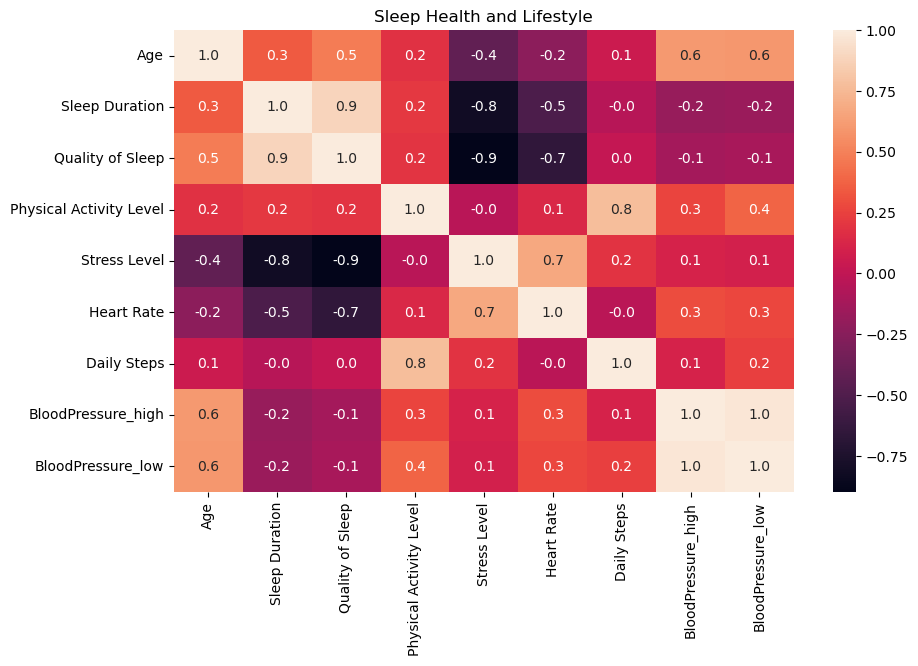

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.heatmap(sh.drop('Person ID', axis = 1).corr(), annot=True, fmt='1.1f')
plt.title('Sleep Health and Lifestyle')
plt.show()

## 데이터 나누기

In [8]:
sh_in = sh[['Age', 'Sleep Duration', 'Quality of Sleep', 
            'Physical Activity Level', 'Stress Level', 
            'Heart Rate', 'BloodPressure_high', 'Daily Steps']].to_numpy()

sh_tar = sh['Sleep Disorder'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split

tr_in, te_in, tr_tar, te_tar = train_test_split(
            sh_in, sh_tar, test_size = 0.4, random_state = 45)

In [10]:
tr_s, te_s, tr_val, te_val = train_test_split(
        tr_in, tr_tar, test_size = 0.2, random_state = 42)

## 결정트리

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(tr_s, tr_val)

print('훈련모델 결과:', dt.score(tr_s, tr_val))
print('테스트 결과:', dt.score(te_s, te_val))

훈련모델 결과: 0.9329608938547486
테스트 결과: 0.9111111111111111


### 결정트리 특성 중요도 확인

In [12]:
dt.fit(tr_in, tr_tar)
dt.feature_importances_

array([0.06654908, 0.05302117, 0.00143373, 0.25096283, 0.        ,
       0.0037801 , 0.60114866, 0.02310444])

## 교차검증

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)

In [14]:
from sklearn.model_selection import cross_validate, StratifiedKFold
 
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
    
scores = cross_validate(dt, tr_in, tr_tar, return_train_score=True, cv=splitter)
scores

{'fit_time': array([0.00398779, 0.00299549, 0.00199533, 0.00099468, 0.00199509,
        0.00199485, 0.0019958 , 0.00299215, 0.00299692, 0.00199437]),
 'score_time': array([0.        , 0.        , 0.00099897, 0.        , 0.        ,
        0.        , 0.00099802, 0.00199485, 0.00099182, 0.00099802]),
 'test_score': array([0.86956522, 0.91304348, 0.91304348, 0.86956522, 0.77272727,
        0.81818182, 0.90909091, 0.86363636, 0.81818182, 0.86363636]),
 'train_score': array([0.94029851, 0.94029851, 0.94029851, 0.93034826, 0.94554455,
        0.94059406, 0.93069307, 0.94059406, 0.94059406, 0.94059406])}

In [15]:
print('훈련모델 결과:', np.mean(scores['train_score']))
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9389857642480666
테스트 결과: 0.8610671936758892


## 그리드서치

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

par = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), par, n_jobs=-1)
gs.fit(tr_in, tr_tar)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [21]:
gs.best_params_

{'min_impurity_decrease': 0.0001}

In [22]:
gs.cv_results_['mean_test_score']

array([0.88393939, 0.88393939, 0.88393939, 0.87949495, 0.87949495])

In [23]:
best_idx = np.argmax(gs.cv_results_['mean_test_score'])
gs.cv_results_['params'][best_idx]

{'min_impurity_decrease': 0.0001}

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

par = {'min_impurity_decrease': uniform(0.0001, 0.001),
      'max_depth': randint(20, 50),
      'min_samples_split': randint(2, 25),
      'min_samples_leaf': randint(1, 25),
      }

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), par,
                       n_iter = 100, n_jobs = -1, random_state = 42)
gs.fit(tr_in, tr_tar)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000130B1A74490>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000130B19C2F20>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000130B1A75210>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000130B1A74F70>},
                   random_state=42)

In [25]:
gs.best_params_

{'max_depth': 42,
 'min_impurity_decrease': 0.00015808361216819946,
 'min_samples_leaf': 24,
 'min_samples_split': 22}

In [26]:
np.max(gs.cv_results_['mean_test_score'])

0.906060606060606

In [27]:
dt = gs.best_estimator_

print('훈련모델 결과:', dt.score(tr_in, tr_tar))
print('테스트 결과:', dt.score(te_in, te_tar))

훈련모델 결과: 0.90625
테스트 결과: 0.9133333333333333


### 그리드서치 특성 중요도 확인

In [30]:
dt.fit(tr_in, tr_tar)
dt.feature_importances_

array([0.0031327, 0.       , 0.       , 0.296929 , 0.       , 0.       ,
       0.6999383, 0.       ])

## 랜덤 포레스트

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(rf, tr_in, tr_tar, return_train_score=True, n_jobs = -1)

print('훈련모델 결과:', np.mean(scores['train_score'])) 
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9397268777157045
테스트 결과: 0.8927272727272728


### 랜덤 포레스트 자체 모델 평가 점수

In [32]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(tr_in, tr_tar)
rf.oob_score_

0.8794642857142857

### 랜덤 포레스트 특성 중요도 확인

In [33]:
rf.fit(tr_in, tr_tar)
rf.feature_importances_

array([0.20017877, 0.21157347, 0.05298897, 0.09188461, 0.05800107,
       0.0816382 , 0.23512445, 0.06861046])

## 엑스트라 트리

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(et, tr_in, tr_tar, return_train_score=True, n_jobs = -1)

print('훈련모델 결과:', np.mean(scores['train_score'])) 
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9397268777157045
테스트 결과: 0.8705050505050504


### 엑스트라 트리 특성 중요도

In [35]:
et.fit(tr_in, tr_tar)
et.feature_importances_

array([0.15676308, 0.17459067, 0.0811715 , 0.11878849, 0.083239  ,
       0.07298681, 0.23243231, 0.08002814])

## 그레이디언트 부스팅

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, tr_in, tr_tar, return_train_score=True, n_jobs = -1)

print('훈련모델 결과:', np.mean(scores['train_score'])) 
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9397268777157045
테스트 결과: 0.8928282828282829


### 학습률 조정

In [37]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, 
                                random_state=42)
scores = cross_validate(gb, tr_in, tr_tar, return_train_score=True, n_jobs = -1)

print('훈련모델 결과:', np.mean(scores['train_score'])) 
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9397268777157045
테스트 결과: 0.883939393939394


### 그레이디언트 부스팅 특성 중요도

In [38]:
gb.fit(tr_in, tr_tar)
gb.feature_importances_

array([0.0499923 , 0.33729875, 0.01414496, 0.02527074, 0.00169914,
       0.03707805, 0.44014591, 0.09437015])

## 히스토그램 기반 그레이디언트 부스팅

In [39]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, tr_in, tr_tar, return_train_score=True, n_jobs=-1)

print('훈련모델 결과:', np.mean(scores['train_score'])) 
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9397268777157045
테스트 결과: 0.8882828282828283


### 훈련 세트 특성 중요도 확인

In [40]:
from sklearn.inspection import permutation_importance

hgb.fit(tr_in, tr_tar)
result = permutation_importance(hgb, tr_in, tr_tar, n_repeats=10,
                                random_state=42, n_jobs=-1)
result.importances_mean

array([0.053125  , 0.20625   , 0.00892857, 0.01517857, 0.00133929,
       0.003125  , 0.26830357, 0.03705357])

### 테스트 세트 특성 중요도 확인

In [41]:
result = permutation_importance(hgb, te_in, te_tar, n_repeats=10,
                                random_state=42, n_jobs=-1)
result.importances_mean

array([-0.008     ,  0.178     ,  0.03066667,  0.04      ,  0.03266667,
        0.03666667,  0.252     ,  0.06666667])

## 다중 회귀

In [42]:
from sklearn.preprocessing import LabelEncoder

lab_en = LabelEncoder()

tr_tar_en = lab_en.fit_transform(tr_tar)
te_tar_en = lab_en.transform(te_tar)

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(tr_in, tr_tar_en)

print('훈련모델 결과:', lr.score(tr_in, tr_tar_en))
print('테스트 결과:', lr.score(te_in, te_tar_en))

훈련모델 결과: 0.2930833625616216
테스트 결과: 0.40418060697113223


## 릿지 회귀

In [145]:
from sklearn.linear_model import Ridge

rdg = Ridge()
rdg.fit(tr_in, tr_tar_en)
print('훈련모델 결과:', rdg.score(tr_in, tr_tar_en))
print('테스트 결과:', rdg.score(te_in, te_tar_en))

훈련모델 결과: 0.29305206231739045
테스트 결과: 0.40472302084957723


## 라쏘 회귀

In [146]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(tr_in, tr_tar_en)

print('훈련모델 결과:', ls.score(tr_in, tr_tar_en))
print('테스트 결과:', ls.score(te_in, te_tar_en))

훈련모델 결과: 0.1338627076545823
테스트 결과: 0.15989869167126103


# 결과

#### 이전에 활용했던 모델 중 10종류의 모델을 사용해 본 결과,

#### 결정트리
    - 훈련모델 결과: 0.9329608938547486
    - 테스트 결과: 0.9111111111111111
    - 결과 차이: 0.0218497827436375, 약 0.021

#### 교차검증
    - 훈련모델 결과: 0.9389857642480666
    - 테스트 결과: 0.8610671936758892
    - 결과 차이: 0.0779185705721774, 약 0.077

#### 그리드서치
    - 훈련모델 결과: 0.90625
    - 테스트 결과: 0.9133333333333333
    - 결과 차이: -0.0070833333333333, 약 -0.007

#### 랜덤 포레스트
    - 훈련모델 결과: 0.9397268777157045
    - 테스트 결과: 0.8927272727272728
    - 결과 차이: 0.0469996049884317, 약 0.046

#### 엑스트라 트리
    - 훈련모델 결과: 0.9397268777157045
    - 테스트 결과: 0.8705050505050504
    - 결과 차이: 0.0692218272106541, 약 0.069

#### 그레이디언트 부스팅
    - 훈련모델 결과: 0.9397268777157045
    - 테스트 결과: 0.8928282828282829
    - 결과 차이: 0.0468985948874216, 약 0.046

#### 학습률 조정값
    - 훈련모델 결과: 0.9397268777157045
    - 테스트 결과: 0.883939393939394
    - 결과 차이: 0.0557874837763105, 약 0.055

#### 히스토그램 기반 그레이디언트 부스팅
    - 훈련모델 결과: 0.9397268777157045
    - 테스트 결과: 0.8882828282828283
    - 결과 차이: 0.0514440494328762, 약 0.051

#### 다중 회귀
    - 훈련모델 결과: 0.2930833625616216
    - 테스트 결과: 0.40418060697113223
    - 결과 차이: -0.1110972444095106, 약 -0.111

#### 릿지 회귀
    - 훈련모델 결과: 0.29305206231739045
    - 테스트 결과: 0.40472302084957723
    - 결과 차이: -0.1116709585321868, 약 -0.111

#### 라쏘 회귀
    - 훈련모델 결과: 0.1338627076545823
    - 테스트 결과: 0.15989869167126103
    - 결과 차이: -0.0260359840166787, 약 -0.026

- 모델들의 각각 결과 차이를 보면 -0.007로 그리드 서치의 결과값이 가장 근접하며, 
- 다중 회귀와 릿지 회귀의 결과값이 -0.111 로 서로 비슷하지만,
- 근소한 차이로 릿지 회귀의 훈련모델과 테스트모델의 결과값이 먼 것을 알 수 있다.
- 또한, 다중 회귀, 릿지 회귀, 라쏘 회귀의 결과값들이 낮은 것을 볼 수 있다.